<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


*   Extract information from a given web site
*   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br>


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Import required libraries
import requests
from bs4 import BeautifulSoup

Download the webpage at the url


In [3]:
# Download web page
web_dt = requests.get(url).text

Create a soup object


In [4]:
# Create soup object
soup = BeautifulSoup(web_dt, 'html5lib')

Scrape the `Language name` and `annual average salary`.


In [5]:
# Find table target
tb = soup.find('table')
tb

<table>
<tbody>
<tr>
<td>No.</td>
<td>Language</td>
<td>Created By</td>
<td>Average Annual Salary</td>
<td>Learning Difficulty</td>
</tr>
<tr>
<td>1</td>
<td>Python</td>
<td>Guido van Rossum</td>
<td>$114,383</td>
<td>Easy</td>
</tr>
<tr>
<td>2</td>
<td>Java</td>
<td>James Gosling</td>
<td>$101,013</td>
<td>Easy</td>
</tr>
<tr>
<td>3</td>
<td>R</td>
<td>Robert Gentleman, Ross Ihaka</td>
<td>$92,037</td>
<td>Hard</td>
</tr>
<tr>
<td>4</td>
<td>Javascript</td>
<td>Netscape</td>
<td>$110,981</td>
<td>Easy</td>
</tr>
<tr>
<td>5</td>
<td>Swift</td>
<td>Apple</td>
<td>$130,801</td>
<td>Easy</td>
</tr>
<tr>
<td>6</td>
<td>C++</td>
<td>Bjarne Stroustrup</td>
<td>$113,865</td>
<td>Hard</td>
</tr>
<tr>
<td>7</td>
<td>C#</td>
<td>Microsoft</td>
<td>$88,726</td>
<td>Hard</td>
</tr>
<tr>
<td>8</td>
<td>PHP</td>
<td>Rasmus Lerdorf</td>
<td>$84,727</td>
<td>Easy</td>
</tr>
<tr>
<td>9</td>
<td>SQL</td>
<td>Donald D. Chamberlin, Raymond F. Boyce.</td>
<td>$84,793</td>
<td>Easy</td>
</tr>
<tr>
<td>10</t

In [6]:
# Find language names and annual average salaries
# in the table and store them in list objects
langs = []
salaries = []
for row in tb.find_all('tr'):
    cells = row.find_all('td')
    langs.append(cells[1].getText())
    salaries.append(cells[3].getText())

Save the scrapped data into a file named *popular-languages.csv*


In [7]:
# Store and export to .csv format
import pandas as pd
df = pd.DataFrame({'Language_Name':langs[1:], "Annual_Average_Salaries": salaries[1:]})
df.to_csv('lang_salary.csv', index=False)

In [18]:
df = pd.read_csv('lang_salary.csv')
df

,Language_Name,Annual_Average_Salaries
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


In [19]:
df.Annual_Average_Salaries = df.Annual_Average_Salaries.str.replace('[$,]', '', regex=True).astype(int)
df.info

,Language_Name,Annual_Average_Salaries
0,Python,114383
1,Java,101013
2,R,92037
3,Javascript,110981
4,Swift,130801
5,C++,113865
6,C#,88726
7,PHP,84727
8,SQL,84793
9,Go,94082


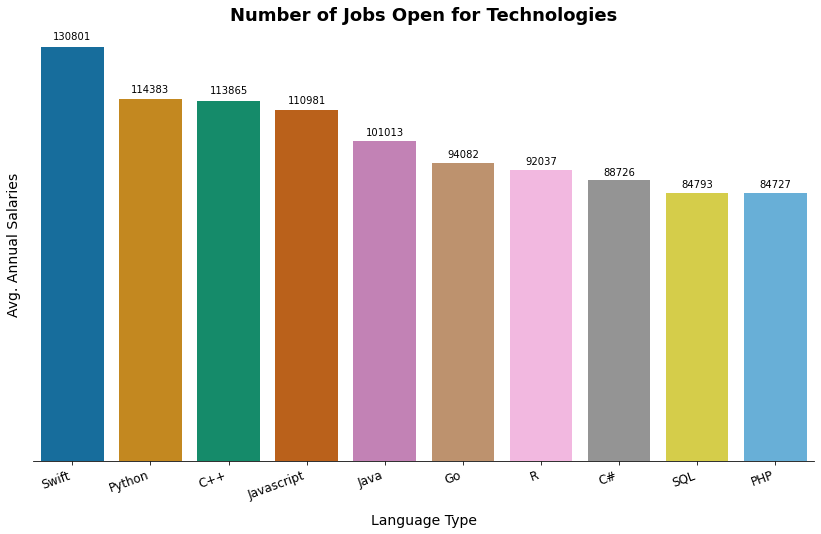

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


def hide_spine(*args):
    for arg in args:
        ax.spines[arg].set_visible(None)
        
    if 'left' in args:
        plt.yticks([])


def show_values(ax):
    for p in ax.patches:
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + p.get_height()*1.02
        value = '{}'.format(int(p.get_height()))
        ax.text(_x, _y, value, ha="center")
        
# Set bar colors
colors = sns.color_palette('colorblind')[:13]

# Set figure size
plt.figure(figsize=(14, 8))

# Plotting
ax = sns.barplot(data=df, x='Language_Name', y='Annual_Average_Salaries', order=df.sort_values(by='Annual_Average_Salaries', ascending=False).Language_Name,palette=colors)
plt.title("Number of Jobs Open for Technologies", fontsize=18, fontweight='bold')

# Change figure properties
plt.xticks(fontsize=12, rotation=20, ha='right')
plt.xlabel('Language Type', fontsize=14, labelpad=12)
plt.ylabel('Avg. Annual Salaries', fontsize=14, labelpad=12);
show_values(ax)
hide_spine('top', 'right', 'left')

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01).
